In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
from astropy.io import fits
import numpy as np
from numpy import sqrt,exp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
source_name='3C 279'
ra=194.046527
dec=-5.789314
radius=15.
Tstart='2015-06-01T00:00:00'
Tstop='2015-06-30T00:00:00'
host='https://www.astro.unige.ch/cdci/astrooda/dispatch-data'
time_bin=10000
Nbins=7 # number of time bin in the long-term lightcurve
E1_keV=20.
E2_keV=100.

In [3]:
# try: input = raw_input
# except NameError: pass
# token=input() # token for restricted access server
# cookies=dict(_oauth2_proxy=token)
disp=DispatcherAPI(host=host)

In [4]:
disp=DispatcherAPI(host=host)

In [5]:
import requests
url="https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/"
def queryxtime(**args):
    params=Tstart+'/'+Tstop+'?&ra='+str(ra)+'&dec='+str(dec)+'&radius='+str(radius)+'&min_good_isgri=100'
    print(url+params)
    return requests.get(url+params).json()
#,cookies=cookies

In [6]:
scwlist=queryxtime()
m=len(scwlist)
pointings_osa10=[]
pointings_osa11=[]
for i in range(m):
    if scwlist[i][-2:]=='10':
        if(int(scwlist[i][:4])<1626):
            pointings_osa10.append(scwlist[i]+'.001')
        else:
            pointings_osa11.append(scwlist[i]+'.001')
#else:
#    pointings=np.genfromtxt('scws_3C279_isgri_10deg.txt', dtype='str')
m_osa10=len(pointings_osa10)
m_osa11=len(pointings_osa11)

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2015-06-01T00:00:00/2015-06-30T00:00:00?&ra=194.046527&dec=-5.789314&radius=15.0&min_good_isgri=100


In [7]:
scw_lists_osa10=[]
scw_lists_osa11=[]
count=0
scw_string=''
for i in range(m_osa10):
    if count<50:
        scw_string=scw_string+str(pointings_osa10[i])+','
        count+=1
    else:
        scw_lists_osa10.append(scw_string[:-1])
        count=1
        scw_string=str(pointings_osa10[i])+','
scw_lists_osa10.append(scw_string[:-1])
print(len(scw_lists_osa10))
count=0
scw_string=''
for i in range(m_osa11):
    if count<50:
        scw_string=scw_string+str(pointings_osa11[i])+','
        count+=1
    else:
        scw_lists_osa11.append(scw_string[:-1])
        count=0
        scw_string=str(pointings_osa11[i])+','
scw_lists_osa11.append(scw_string[:-1])
print(len(scw_lists_osa11))

2
1


In [8]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      scw_list=scw_lists_osa10[0],
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=3,
                      product_type='Real')

154700450010.001,154800040010.001,154800050010.001,154800060010.001,154800070010.001,154800080010.001,154800140010.001,154800150010.001,154800160010.001,154800170010.001,154800250010.001,154800460010.001,154900050010.001,154900060010.001,154900070010.001,154900080010.001,154900090010.001,154900140010.001,154900150010.001,154900160010.001,154900170010.001,154900180010.001,154900260010.001,154900470010.001,155000070010.001,155000080010.001,155000090010.001,155000100010.001,155000160010.001,155000170010.001,155000180010.001,155000190010.001,155000200010.001,155000210010.001,155000320010.001,155000330010.001,155000340010.001,155100080010.001,155100090010.001,155100200010.001,155100210010.001,155100220010.001,155100230010.001,155100240010.001,155200020010.001,155200100010.001,155200110010.001,155200120010.001,155200130010.001,155200140010.001
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
the job has been submitted on the remote 

In [9]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str15,float64,float64,float64,int64,int64,int64,object
2,3C 273,12.550069808959961,187.27389526367188,2.06772518157959,-32768,2,0,0.0002800000074785203
11,IGR J11592+1437,3.7670397758483887,179.8090057373047,14.621000289916992,-32768,1,0,0.08332999795675278
26,IGR J12288+0052,3.0956599712371826,187.19041442871094,0.8386111259460449,-32768,2,0,0.00013888889225199819
38,IGR J13091+1137,4.048680305480957,197.27333068847656,11.634139060974121,-32768,2,0,0.00016999999934341758
56,NGC 4388,3.38708233833313,186.44554138183594,12.662028312683105,-32768,2,0,0.0002800000074785203
57,NGC 4593,4.102994441986084,189.91429138183594,-5.344250202178955,-32768,2,0,0.0002800000074785203
73,NEW_1,7.0470051765441895,185.59225463867188,-3.0725700855255127,-32767,0,0,None
74,NEW_2,7.299623012542725,197.28030395507812,14.018869400024414,-32767,0,0,None


In [10]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    if(n[0:3]=='NEW'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
data.dispatcher_catalog_1.table.remove_rows(torm)
nrows=len(data.dispatcher_catalog_1.table['src_names'])

In [11]:
if FLAG==0:
    data.dispatcher_catalog_1.table.add_row((0,'3C 279',0,ra,dec,0,2,0,0))
    
data.dispatcher_catalog_1.table    

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str15,float64,float64,float64,int64,int64,int64,object
2,3C 273,12.550069808959961,187.27389526367188,2.06772518157959,-32768,2,0,0.0002800000074785203
11,IGR J11592+1437,3.7670397758483887,179.8090057373047,14.621000289916992,-32768,1,0,0.08332999795675278
26,IGR J12288+0052,3.0956599712371826,187.19041442871094,0.8386111259460449,-32768,2,0,0.00013888889225199819
38,IGR J13091+1137,4.048680305480957,197.27333068847656,11.634139060974121,-32768,2,0,0.00016999999934341758
56,NGC 4388,3.38708233833313,186.44554138183594,12.662028312683105,-32768,2,0,0.0002800000074785203
57,NGC 4593,4.102994441986084,189.91429138183594,-5.344250202178955,-32768,2,0,0.0002800000074785203
110,3C 273,3.0909929275512695,187.2778778076172,2.0523886680603027,-32768,2,0,0.0002800000074785203
125,NGC 5100,3.929424524307251,200.24526977539062,8.903253555297852,-32768,1,0,0.0676666647195816


In [12]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [13]:
lc_results=[]
for i in range(len(scw_lists_osa10)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        scw_list=scw_lists_osa10[i],
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        time_bin=time_bin,
                        selected_catalog=api_cat)
    lc_results.append(data)
    


0
154700450010.001,154800040010.001,154800050010.001,154800060010.001,154800070010.001,154800080010.001,154800140010.001,154800150010.001,154800160010.001,154800170010.001,154800250010.001,154800460010.001,154900050010.001,154900060010.001,154900070010.001,154900080010.001,154900090010.001,154900140010.001,154900150010.001,154900160010.001,154900170010.001,154900180010.001,154900260010.001,154900470010.001,155000070010.001,155000080010.001,155000090010.001,155000100010.001,155000160010.001,155000170010.001,155000180010.001,155000190010.001,155000200010.001,155000210010.001,155000320010.001,155000330010.001,155000340010.001,155100080010.001,155100090010.001,155100200010.001,155100210010.001,155100220010.001,155100230010.001,155100240010.001,155200020010.001,155200100010.001,155200110010.001,155200120010.001,155200130010.001,155200140010.001
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
the job has been submitted on the remot

In [14]:
t=[]
r=[]
err=[]
tot_counts=[]
backv=[]
backe=[]
i=0
for lc in lc_results:
    for ID,s in enumerate(lc._p_list):
        if s.meta_data['src_name']==source_name:
            i=i+1
            for tt in s.data_unit[1].data['TIME']:
                t.append(tt)
            for rr in s.data_unit[1].data['RATE']:
                r.append(rr)
            for ee in s.data_unit[1].data['ERROR']:
                err.append(ee)
            for tc in s.data_unit[1].data['TOT_COUNTS']:
                tot_counts.append(tc)
            for bv in s.data_unit[1].data['BACKV']:
                backv.append(bv)
            for be in s.data_unit[1].data['BACKE']:
                backe.append(be)

t=np.array(t)
r=np.array(r)
err=np.array(err)
tot_counts=np.array(tot_counts)
backv=np.array(backv)
backe=np.array(backe)

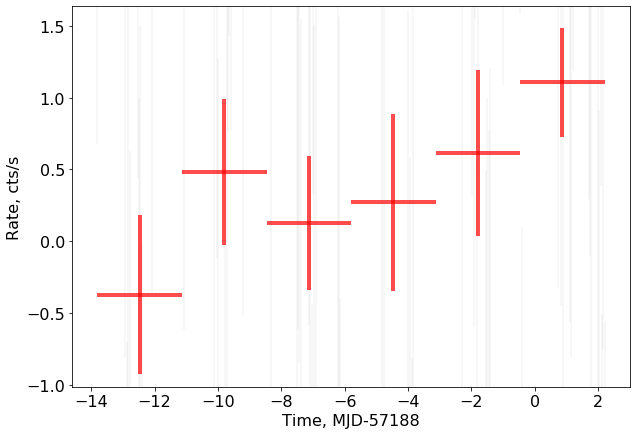

In [15]:
fig = plt.figure(figsize=(10,7))
Nbins=7
t0=51544
tmin=t0+t[0]
tmax=t0+t[-1]
time=np.linspace(tmin,tmax,Nbins)
dtime=time[1]-time[0]
time_av=time-dtime/2.
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
j=0
sc=1.

k=0
while (j<len(time)):
    while ((t[k]+t0<time[j])):
        if (err[k]>0.):
            flux[j]=flux[j]+r[k]/(err[k])**2
            error[j]=error[j]+1./(err[k])**2
        k=k+1
        if (k==len(t)):
            break
    if (k==len(t)):
        break
    else:
        j=j+1
plt.errorbar(t+t0-57188,r*exp((t+t0-52900)/40000.),yerr=err*exp((t+t0-52900)/40000.),linestyle='none',color='black',alpha=0.03,linewidth=2)

for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])*exp((time_av[i]-52900)/40000.)
        error[i]=1./sqrt(error[i])*exp((time_av[i]-52900)/40000.)
ind=error>0
plt.errorbar(time_av[ind]-57188,flux[ind],yerr=error[ind],xerr=dtime/2.,linestyle='none',color='red',alpha=0.7,linewidth=4)
#plt.plot(time_av,exp((time_av-52900)/40000.)/2)
plt.tick_params(axis='both', which='major', labelsize=16)
ymin=1.1*min(flux-error)
ymax=1.1*max(flux+error)
plt.ylim(ymin,ymax)
plt.xlabel('Time, MJD-57188',fontsize=16)
plt.ylabel('Rate, cts/s',fontsize=16)
#plt.text(tmin,0.9*ymax, str(E1_keV)+'-'+str(E2_keV)+' keV',fontsize=16)
#plt.text(tmin,0.8*ymax, source_name,fontsize=16)

name=source_name.replace(" ", "")
plt.savefig(name+'_lc_flare.pdf',format='pdf',dpi=100)




In [16]:
lc_3C279=name+'_lc_flare.pdf'